In [18]:
#import dependencies
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import time
from datetime import datetime
from config import weather_api_key

In [19]:
# Create basic url for API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
#create a set of 1500 random latitude and longitude combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [21]:
#add coordinates to a list
coordinates = list(lat_lngs)

In [22]:
# Create list for cities 
cities = []

# Use citipy to find nearest cities using coordinate list
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1])
    city_name = city.city_name
    
    # Find unique cities to add to cities list
    if city_name not in cities:
        cities.append(city_name)
# Count amount of unique cities
len(cities)

635

In [23]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
         # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_hum = city_weather['main']['humidity']
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_hum,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | kokkola
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | eureka
Processing Record 5 of Set 1 | bari
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | moncagua
Processing Record 8 of Set 1 | ichhawar
Processing Record 9 of Set 1 | agartala
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | sioux lookout
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | kalmunai
Processing Record 16 of Set 1 | charlestown
Processing Record 17 of Set 1 | krasnyy chikoy
Processing Record 18 of Set 1 | falmouth
Processing Record 19 of Set 1 | aksu
Processing Record 20 of Set 1 | talaya
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of S

Processing Record 38 of Set 4 | rawson
Processing Record 39 of Set 4 | baft
Processing Record 40 of Set 4 | sturgis
Processing Record 41 of Set 4 | chuy
Processing Record 42 of Set 4 | cape town
Processing Record 43 of Set 4 | hithadhoo
Processing Record 44 of Set 4 | arraial do cabo
Processing Record 45 of Set 4 | sayyan
Processing Record 46 of Set 4 | honiara
Processing Record 47 of Set 4 | namibe
Processing Record 48 of Set 4 | moerai
Processing Record 49 of Set 4 | ovalle
Processing Record 50 of Set 4 | mar del plata
Processing Record 1 of Set 5 | akita
Processing Record 2 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 5 | north branch
Processing Record 5 of Set 5 | floro
Processing Record 6 of Set 5 | aklavik
Processing Record 7 of Set 5 | qaanaaq
Processing Record 8 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 5 | gaoyou
Processing Record 10 of

Processing Record 29 of Set 8 | termoli
Processing Record 30 of Set 8 | kavaratti
Processing Record 31 of Set 8 | chapleau
Processing Record 32 of Set 8 | ayagoz
Processing Record 33 of Set 8 | sarahan
Processing Record 34 of Set 8 | vyshestebliyevskaya
Processing Record 35 of Set 8 | sept-iles
Processing Record 36 of Set 8 | erzin
Processing Record 37 of Set 8 | staryy nadym
Processing Record 38 of Set 8 | tura
Processing Record 39 of Set 8 | lolua
City not found. Skipping...
Processing Record 40 of Set 8 | cidreira
Processing Record 41 of Set 8 | coos bay
Processing Record 42 of Set 8 | lodwar
Processing Record 43 of Set 8 | esperance
Processing Record 44 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 45 of Set 8 | mayumba
Processing Record 46 of Set 8 | ciudad bolivar
Processing Record 47 of Set 8 | senekal
Processing Record 48 of Set 8 | troitsko-pechorsk
Processing Record 49 of Set 8 | panambi
Processing Record 50 of Set 8 | college
Processing Record 1 of Set 9 |

Processing Record 19 of Set 12 | okha
Processing Record 20 of Set 12 | foz
Processing Record 21 of Set 12 | port lincoln
Processing Record 22 of Set 12 | tomatlan
Processing Record 23 of Set 12 | baykit
Processing Record 24 of Set 12 | russell
Processing Record 25 of Set 12 | monrovia
Processing Record 26 of Set 12 | luwuk
Processing Record 27 of Set 12 | khanpur
Processing Record 28 of Set 12 | suffolk
Processing Record 29 of Set 12 | viedma
Processing Record 30 of Set 12 | caledonia
Processing Record 31 of Set 12 | tahta
Processing Record 32 of Set 12 | chiradzulu
Processing Record 33 of Set 12 | besenyszog
Processing Record 34 of Set 12 | evensk
Processing Record 35 of Set 12 | keti bandar
Processing Record 36 of Set 12 | marcona
City not found. Skipping...
Processing Record 37 of Set 12 | filingue
Processing Record 38 of Set 12 | vallenar
Processing Record 39 of Set 12 | manor
Processing Record 40 of Set 12 | kruisfontein
Processing Record 41 of Set 12 | ilhabela
Processing Record 

In [24]:
#convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,76.28,68,0,22.73,PF,2022-05-14 15:48:44
1,Kokkola,63.8385,23.1307,48.36,91,20,5.75,FI,2022-05-14 15:52:14
2,Klaksvik,62.2266,-6.5890,49.12,89,100,4.14,FO,2022-05-14 15:52:14
3,Eureka,40.8021,-124.1637,64.20,95,88,1.01,US,2022-05-14 15:52:15
4,Bari,41.1177,16.8512,81.86,65,0,6.91,IT,2022-05-14 15:52:15


In [26]:
#reorder column order
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-05-14 15:48:44,-23.1203,-134.9692,76.28,68,0,22.73
1,Kokkola,FI,2022-05-14 15:52:14,63.8385,23.1307,48.36,91,20,5.75
2,Klaksvik,FO,2022-05-14 15:52:14,62.2266,-6.5890,49.12,89,100,4.14
3,Eureka,US,2022-05-14 15:52:15,40.8021,-124.1637,64.20,95,88,1.01
4,Bari,IT,2022-05-14 15:52:15,41.1177,16.8512,81.86,65,0,6.91


In [27]:
#create the output file (CSV)
output_data_file = 'weather_data/cities.csv'

#port the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [28]:
#extract relevant fields from the DataFrom for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

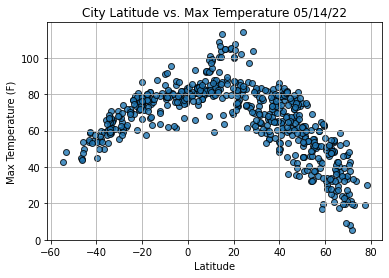

In [39]:
#import the time module
import time

#build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps, 
            edgecolor='Black', linewidth=1,marker='o',
           alpha=0.8, label='Cities')

#icorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime('%x'))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig1.png')

#show the plot
plt.show()

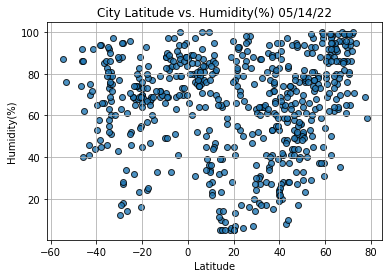

In [40]:
#build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity, 
            edgecolor='Black', linewidth=1,marker='o',
           alpha=0.8, label='Cities')

#icorporate the other graph properties
plt.title(f"City Latitude vs. Humidity(%) " + time.strftime('%x'))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig2.png')

#show the plot
plt.show()

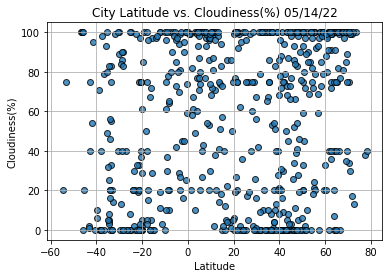

In [41]:
#build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness, 
            edgecolor='Black', linewidth=1,marker='o',
           alpha=0.8, label='Cities')

#icorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness(%) " + time.strftime('%x'))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig3.png')

#show the plot
plt.show()

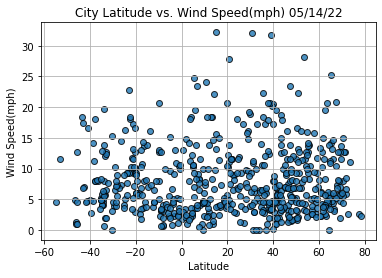

In [42]:
#build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed, 
            edgecolor='Black', linewidth=1,marker='o',
           alpha=0.8, label='Cities')

#icorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed(mph) " + time.strftime('%x'))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig4.png')

#show the plot
plt.show()